In [47]:
import math
import warnings

warnings.filterwarnings("ignore")

import sklearn.datasets
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

###   t-SNE, UMAP and LargeVis

In this and the next notebook we will use manifold learning for data visualization of large data sets (with high dimensionality). In addition to t-SNE, two relatively new methods will be used that are more efficient on large data sets.


- UMAP (Uniform Manifold Approximation and Projection) - Install this Python package: https://umap-learn.readthedocs.io/en/latest/index.html. UMAP package is compatible with scikit-learn, making use of the same API and able to be added to sklearn pipelines. UMAP can work as a drop in replacement for t-SNE and other dimension reduction classes from scikit-learn


- LargeVis (Visualizing Large-scale and High-dimensional Data) - Many techniques (like t-SNE, UMAP and LargeVis) first compute a similarity structure of the data points and then project them into a low-dimensional space with the structure preserved. These two steps suffer from considerable computational costs Comparing to tSNE, LargeVis significantly reduces the computational cost of the graph construction step and employs a principled probabilistic model for the visualization step, the objective of which can be effectively optimized through asynchronous stochastic gradient descent with a linear time complexity. Download this algorithm repository and follow the installation instructions. https://github.com/lferry007/LargeVis


In [58]:
from sklearn.manifold import TSNE
import umap.umap_ as umap

To get data we use the sklearn.datasets.fetch_openml method, which as the name requires, Fetch dataset from openml by name or dataset id. We will use MNIST and Fashion-MNIST(Zalando's article images). Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. Instead of numbers it contains thumbnails of clothes images.

In [3]:
mnist = sklearn.datasets.fetch_openml('mnist_784', version=1, as_frame=False)
fmnist = sklearn.datasets.fetch_openml('Fashion-MNIST', version=1, as_frame=False)

Below are drawings of some samples from mnist and fmnist data sets

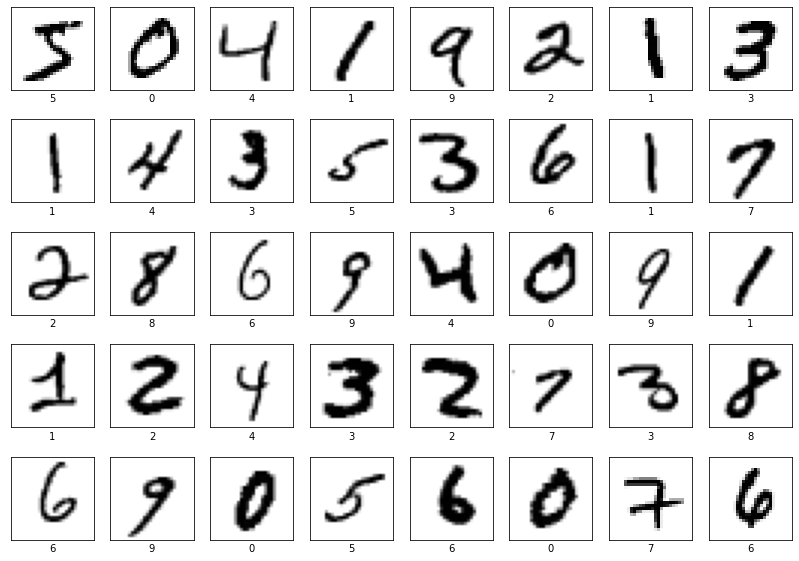

In [4]:
mnist_names = [i for i in range(10)]

plt.figure(figsize=(14, 10))
for i in range(40):
    plt.subplot(5, 8, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(mnist.data[i].reshape((28, 28)), cmap=plt.cm.binary)
    plt.xlabel(mnist_names[int(mnist.target[i])])
plt.show()

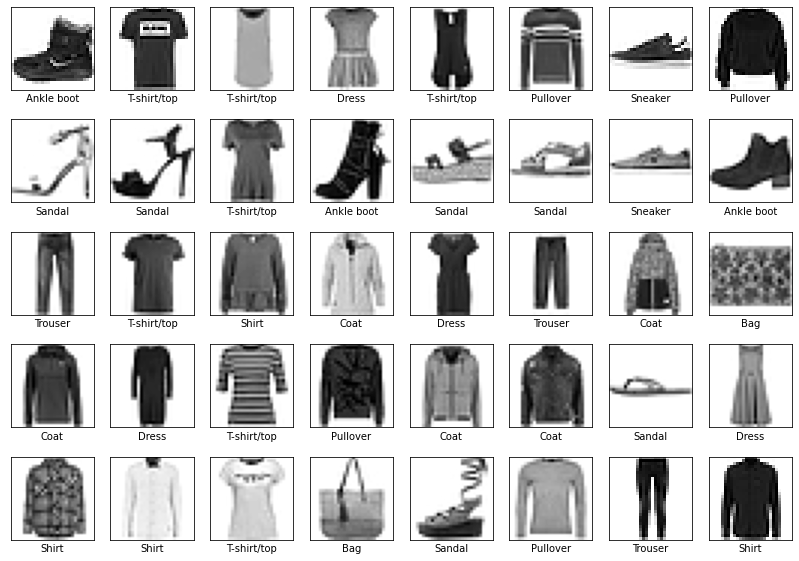

In [5]:
fmnist_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(14, 10))
for i in range(40):
    plt.subplot(5, 8, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(fmnist.data[i].reshape((28, 28)), cmap=plt.cm.binary)
    plt.xlabel(fmnist_names[int(fmnist.target[i])])
plt.show()

#### Use t-SNE, UMAP and LargeVis to project mnist and fmnist data sets into a 2-dimensional space. For LargeVis, you need to create a function that saves the data to the required by LargeVis txt file format, and a function that loads the resulting file. Draw charts for all visualizations.

In [85]:
def dataset_to_df(dataset, amount=10000):
    X = dataset.data / 255.0
    y = dataset.target
    print(X.shape, y.shape)
    feat_cols = ['pixel' + str(i) for i in range(0, X.shape[1])]
    df = pd.DataFrame(X[0:amount], columns=feat_cols)
    df['y'] = y[0:amount]
    return df


def visualize_embedding(df, embedding):
    df['2d-one'] = embedding[:,0]
    df['2d-two'] = embedding[:,1]
    plt.figure(figsize=(16, 10))
    sn.scatterplot(
        x="2d-one", y="2d-two",
        hue="y",
        palette=sn.color_palette("hls", 10),
        data=df,
        legend="full",
        alpha=0.3)

TSNE implementation

In [86]:
def execute_tsne(df):
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(df)
    return tsne_results

UMAP implementation

In [87]:
def execute_umap(df):
    reducer = umap.UMAP(random_state=42)
    umap_result = reducer.fit_transform(df)
    return umap_result

LargeVis Implementation

In [88]:
import os

In [89]:
def save_df_as_txt(df):
    input_path = "data.txt"
    pixels_df = df[df.columns.difference(['y'])]
    file_header = str(len(pixels_df)) + ' ' + str(len(pixels_df.columns)) + '\n'
    np.savetxt(input_path, pixels_df.values, fmt='%s')
    with open(input_path, 'r') as original: data = original.read()
    with open(input_path, 'w') as modified: modified.write(file_header + data)
    return input_path

In [106]:
def execute_large_vis(df):
    input_file = save_df_as_txt(df)
    command = "python LargeVis_run.py -input " + input_file + " -output result.txt -threads 6 -fea 1"
    os.system(command)
    result_df = pd.read_csv('result.txt', delim_whitespace=True)
    result_df.columns = ['x', 'y']
    result_numpy = np.empty((10000,2))
    result_numpy[:, 0] = result_df['x'].tolist()
    result_numpy[:, 1] = result_df['y'].tolist()
    return result_numpy

# Apply Algorithms on MNIST dataset

In [91]:
mnist_df = dataset_to_df(mnist)
mnist_df.head(5)

(70000, 784) (70000,)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


(70000, 784) (70000,)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.004s...
[t-SNE] Computed neighbors for 10000 samples in 2.306s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.196285
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.168915
[t-SNE] KL divergence after 300 iterations: 2.575068


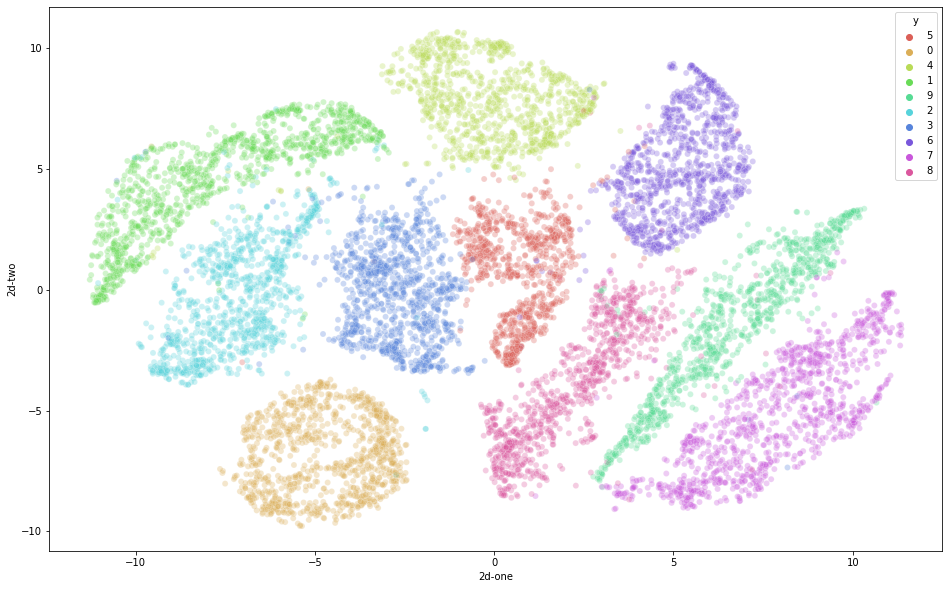

In [92]:
tsne_result_mnist = execute_tsne(dataset_to_df(mnist))
visualize_embedding(mnist_df, tsne_result_mnist)

(70000, 784) (70000,)


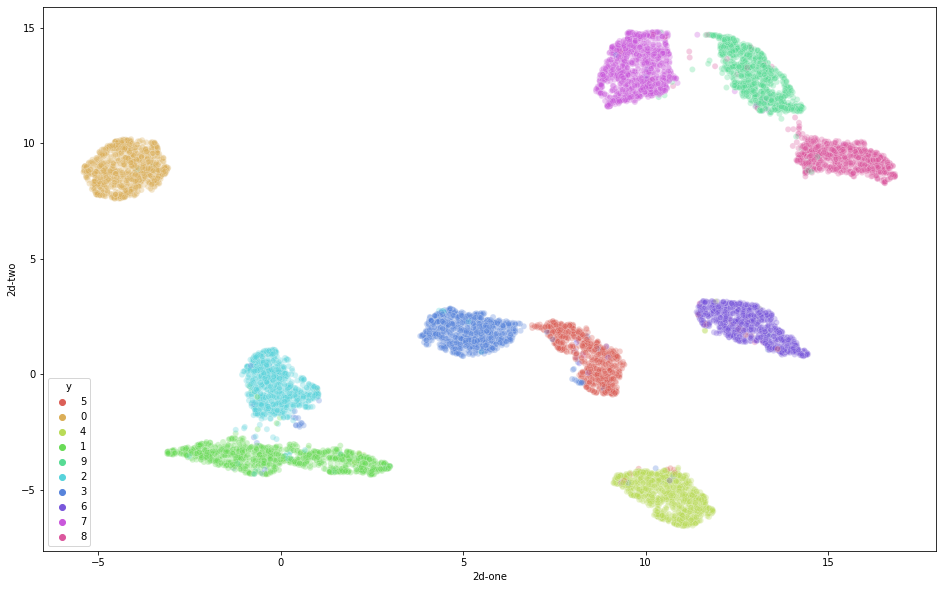

In [93]:
umap_result_mnist = execute_umap(dataset_to_df(mnist))
visualize_embedding(mnist_df, umap_result_mnist)

(70000, 784) (70000,)
LargeVis successfully imported!
Reading input file data.txt ...... Done.
Total vertices : 10000	Dimension : 784
Normalizing ...... Done.
Running ANNOY ...... Done.
Running propagation 3/3
Test knn accuracy : 99.99%
Computing similarities ...... Done.
Fitting model	Alpha: 0.000100 Progress: 99.999%


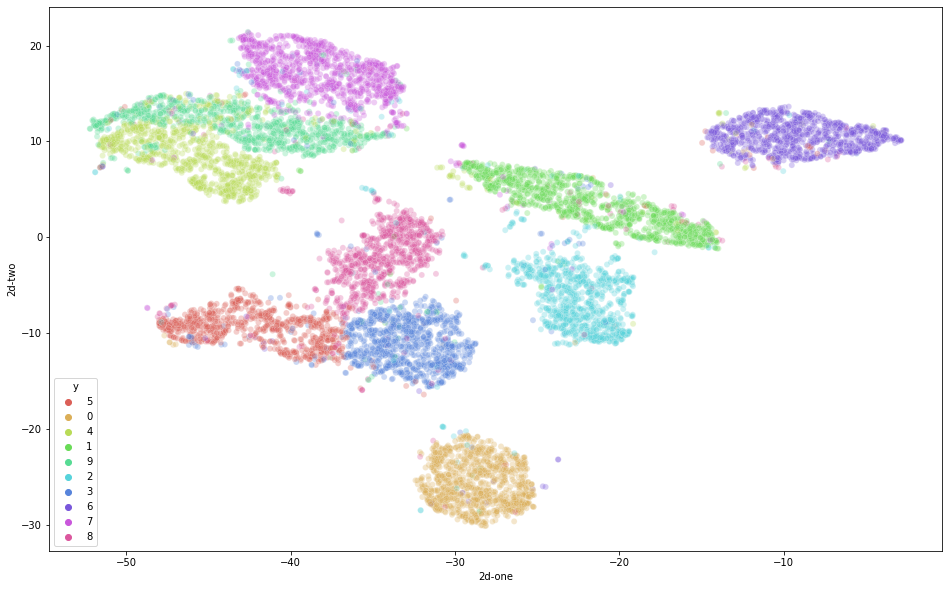

In [107]:
large_vis_result_mnist = execute_large_vis(dataset_to_df(mnist))
visualize_embedding(mnist_df, large_vis_result_mnist)

In [108]:
mnist_result = {
    'TSNE': tsne_result_mnist,
    'UMAP': umap_result_mnist,
    'LARGE_VIS': large_vis_result_mnist
}

# Apply Algorithms on Fashion MNIST dataset

In [109]:
fashion_mnist_df = dataset_to_df(fmnist)
fashion_mnist_df.head(5)

(70000, 784) (70000,)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,9
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.447059,0.509804,0.298039,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.000000,0.003922,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0


(70000, 784) (70000,)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.004s...
[t-SNE] Computed neighbors for 10000 samples in 3.244s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.866560
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.353096
[t-SNE] KL divergence after 300 iterations: 2.458170


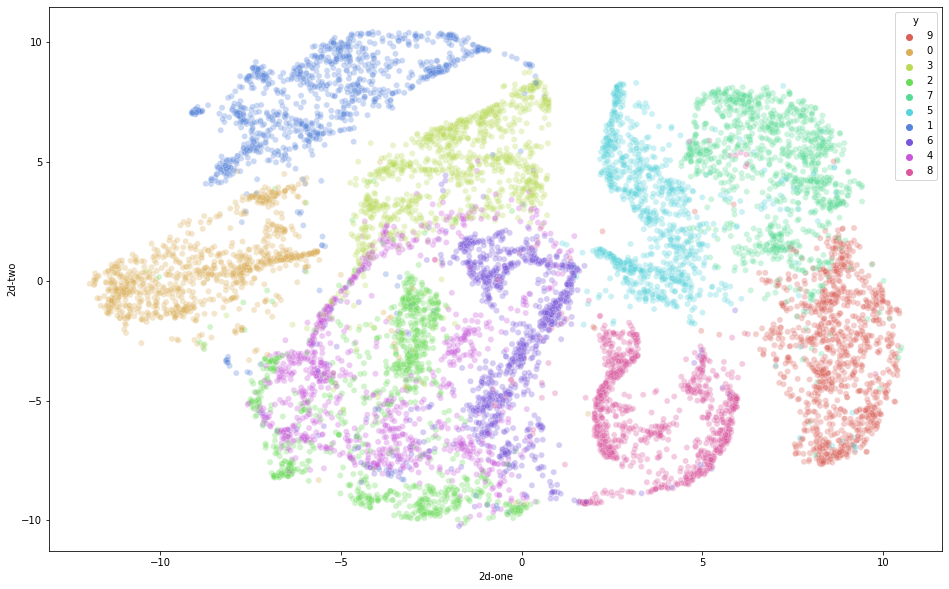

In [110]:
tsne_result_fmnist = execute_tsne(dataset_to_df(fmnist))
visualize_embedding(fashion_mnist_df, tsne_result_fmnist)

(70000, 784) (70000,)


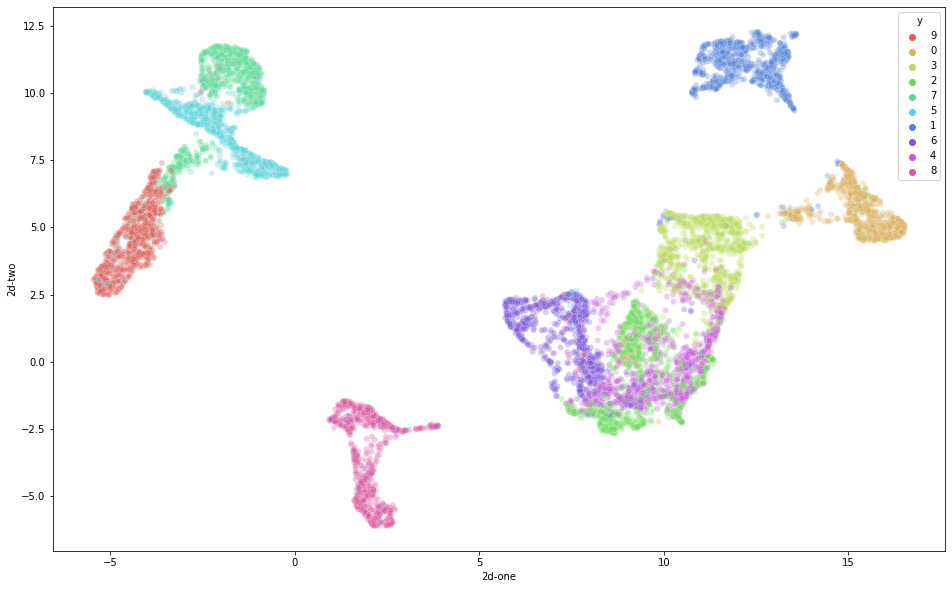

In [111]:
umap_result_fmnist = execute_umap(dataset_to_df(fmnist))
visualize_embedding(fashion_mnist_df, umap_result_fmnist)

(70000, 784) (70000,)
LargeVis successfully imported!
Reading input file data.txt ...... Done.
Total vertices : 10000	Dimension : 784
Normalizing ...... Done.
Running ANNOY ...... Done.
Running propagation 3/3
Test knn accuracy : 100.00%
Computing similarities ...... Done.
Fitting model	Alpha: 0.000100 Progress: 99.998%


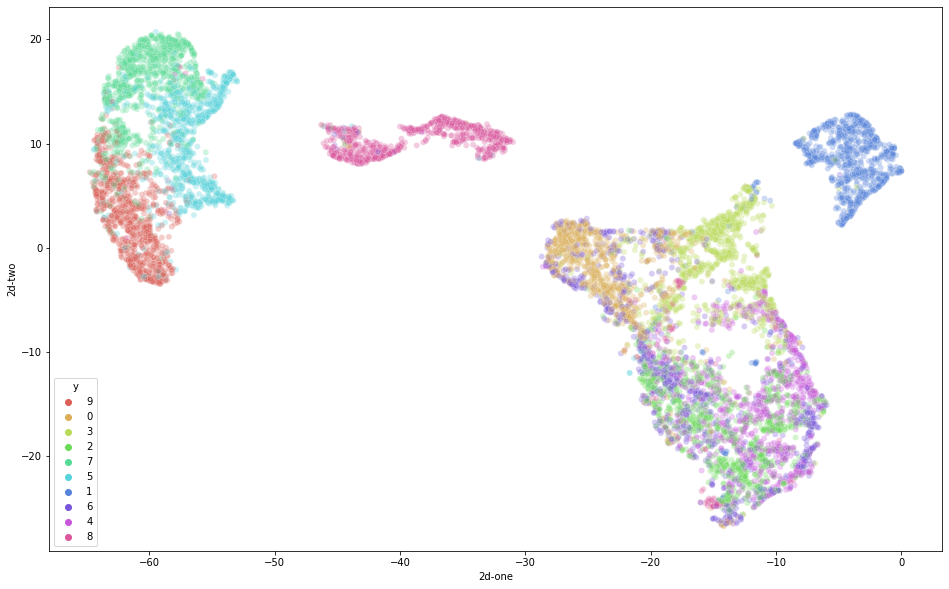

In [112]:
large_vis_result_fmnist = execute_large_vis(dataset_to_df(fmnist))
visualize_embedding(fashion_mnist_df, large_vis_result_fmnist)

In [114]:
fashion_mnist_result = {
    'TSNE': tsne_result_fmnist,
    'UMAP': umap_result_fmnist,
    'LARGE_VIS': large_vis_result_fmnist
}

# Use Euclidian Metric

In [115]:
import math
import random
from statistics import mean

In [116]:
def euclidian_distance(point1, point2):
    x1, y1 = point1[0], point2[1]
    x2, y2 = point2[0], point2[1]
    distance = math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
    return distance

In [117]:
def calculate_avg_distance(method_result, df, selected_label=None, samples=500):
    distances = []
    samples = random.sample(list(zip(method_result, df['y'])), samples)

    for point1, label1 in samples:
        for point2, label2 in samples:
            if selected_label is None and label1 != label2:
                distance = euclidian_distance(point1, point2)
                distances.append(distance)
            if label1 == label2 == selected_label:
                distance = euclidian_distance(point1, point2)
                distances.append(distance)

    return mean(distances)

In [118]:
def compute_euclidian_metric(method_result, df, labels=10):
    avg_distance_between_all_labels = calculate_avg_distance(method_result, df)
    distance_specific_label = []

    for i in range(0, labels):
        distance = calculate_avg_distance(method_result, df, str(i))
        distance_specific_label.append(distance)

    avg_distance_for_specific_labels = mean(distance_specific_label)
    return avg_distance_for_specific_labels / avg_distance_between_all_labels

In [119]:
# Calculate euclidian metric on MNIST Dataset
for key, value in mnist_result.items():
    metric_value = compute_euclidian_metric(value, mnist_df)
    print(f'Method: {key}, euclidian metric value: {metric_value}')

Method: TSNE, euclidian metric value: 0.24311656876624535
Method: UMAP, euclidian metric value: 0.10679313453746825
Method: LARGE_VIS, euclidian metric value: 0.3208675428046471


In [120]:
# Calculate euclidian metric on Fashion MNIST Dataset
for key, value in fashion_mnist_result.items():
    metric_value = compute_euclidian_metric(value, fashion_mnist_df)
    print(f'Method: {key}, euclidian metric value: {metric_value}')

Method: TSNE, euclidian metric value: 0.2577855598012567
Method: UMAP, euclidian metric value: 0.13516425738104312
Method: LARGE_VIS, euclidian metric value: 0.15405533660860662
